# Demo 5: Algorithms01

## Define Geometry

In [1]:
from tigre.geometry import TIGREParameters
geo=TIGREParameters(high_quality=False)

## Load data and generate projections

In [2]:
import numpy as np
from _Ax import Ax
from Test_data import data_loader
# define angles
angles=np.linspace(0,2*np.pi,dtype=np.float32)
# load head phantom data
head=data_loader.load_head_phantom(number_of_voxels=geo.nVoxel)
# generate projections
projections=Ax(head,geo,angles,'interpolated')

## Usage of FDK

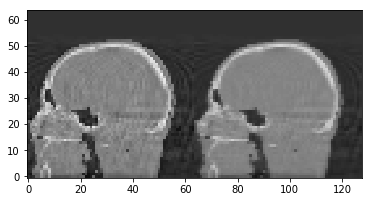

<tigre.Utilities.plotImg.plotImg instance at 0x7f65e0bb0bd8>

In [5]:
from tigre.Algorithms.FDK import FDK
imgfdk1=FDK(projections,geo,angles,filter='ram_lak')
imgfdk2=FDK(projections,geo,angles,filter='hann')
# The look quite similar:
from tigre.Utilities.plotImg import plotImg
plotImg(np.hstack((imgfdk1,imgfdk2)),slice=32,dim='x')

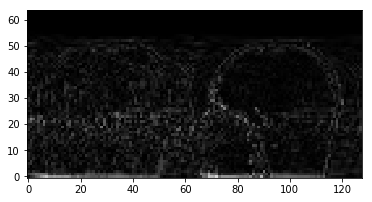

<tigre.Utilities.plotImg.plotImg instance at 0x7f65e0ea44d0>

In [6]:
dif1=abs(head-imgfdk1)
dif2=abs(head-imgfdk2)
plotImg(np.hstack((dif1,dif2)),slice=32,dim='x')